# Diabetes Prediction

### Diabetes Overview
Diabetes mellitus refers to a group of diseases that affect how your body uses blood sugar (glucose). Glucose is vital to your health because it's an important source of energy for the cells that make up your muscles and tissues. It's also your brain's main source of fuel.

### How to Diagnose Diabetes
Typically, diabetes is diagnosed by measuring blood sugar levels in the form of glucose, an important fuel used by cells in the body. The researchers identified several other metabolites that indicate early changes that signify future diabetes risk long before changes in glucose levels occur.

In female gestational diabetes occurs during pregnancy but may resolve after the baby is delivered.

### Symptoms
Diabetes symptoms vary depending on how much your blood sugar is elevated. 

- Increased thirst, Frequent urination, Extreme hunger, Unexplained weight loss
- Presence of ketones in the urine (ketones are a byproduct of the breakdown of muscle and fat that happens when there's not enough available insulin)
- Fatigue, Irritability, Blurred vision, Slow-healing sores 
- Frequent infections, such as gums or skin infections and vaginal infections

### Risk factors
The same factors that increase the odds of getting type 2 diabetes also increase the risk of prediabetes. These factors include:

- Weight--- Being overweight 
- Waist size.------- A large waist size larger than 40 inches and for women with waists larger than 35 inches.
- Diet.----- Eating red meat and processed meat, and drinking sugar-sweetened beverages. 
- Inactivity. ---The less active you are, the greater your risk of prediabetes. 
- Age. Although diabetes can develop at any age, the risk of prediabetes increases after age 45.
- Family history----. Your risk of prediabetes increases if you have a parent or sibling with type 2 diabetes.
- Race or ethnicity.--- Although it's unclear why, certain people — including Black, Hispanic, American Indian and Asian American people — are more likely to develop prediabetes.
- Gestational diabetes.------ If you had diabetes while pregnant (gestational diabetes).
- Polycystic ovary syndrome.--- Women with this common condition — characterized by irregular menstrual periods, excess hair growth and obesity — have a higher risk of prediabetes.
- Sleep.---- People with obstructive sleep apnea.
- Tobacco smoke.------- Smoking may increase insulin resistance. 

**NOTE:**- Dataset of diabetes, taken from the hospital Frankfurt, Germany

In [ ]:
# Let's important the some common library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


**So according to dataset, our target varibable is " Outcome"**

In [ ]:
# Let's check the data size
df.shape

(2000, 9)

In [ ]:
# Let's check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


Great looking like no missing value.
Also there is no any object type feature, great. Let's move forward.

 But undoubtly, dataset has categorical features, like pregnancies. Will discuss later

In [ ]:

# Let's check some stats
df.describe().T  # T means Transformed

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


## Missing Value

In [ ]:
# Check missing values
df.isnull().sum().sum()

0

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Data Visualization


In [ ]:
#!pip install pandas==0.25

In [ ]:
'''
# You can use PandasProfile in order to analysis data.
import pandas_profiling as pp
profile_df = pp.ProfileReport(df)
profile_df
''' 

'\n# You can use PandasProfile in order to analysis data.\nimport pandas_profiling as pp\nprofile_df = pp.ProfileReport(df)\nprofile_df\n'

In [ ]:
# Check the columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Let's collect all columns into series
pd.Series(df.columns)

0                 Pregnancies
1                     Glucose
2               BloodPressure
3               SkinThickness
4                     Insulin
5                         BMI
6    DiabetesPedigreeFunction
7                         Age
8                     Outcome
dtype: object

In [ ]:
#!pip install pandas==1.1.5

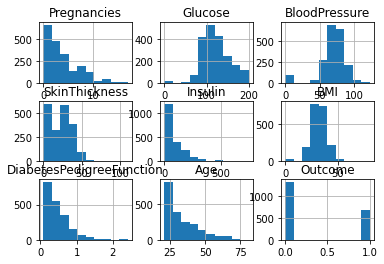

In [ ]:
# let's check the data distribution
#Histogram
df_col = pd.Series(df.columns)
df[df_col].hist()
plt.show()


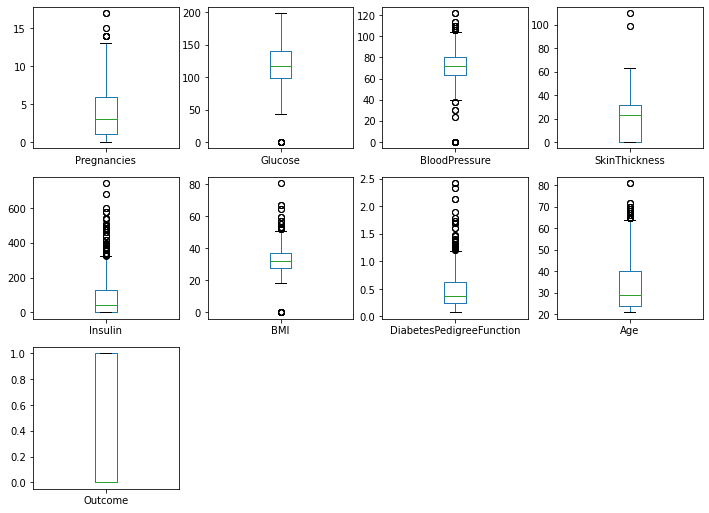

In [ ]:
df.plot(kind = 'box', subplots = True, layout = (4, 4), sharex = False, sharey = False, figsize = (12, 12));

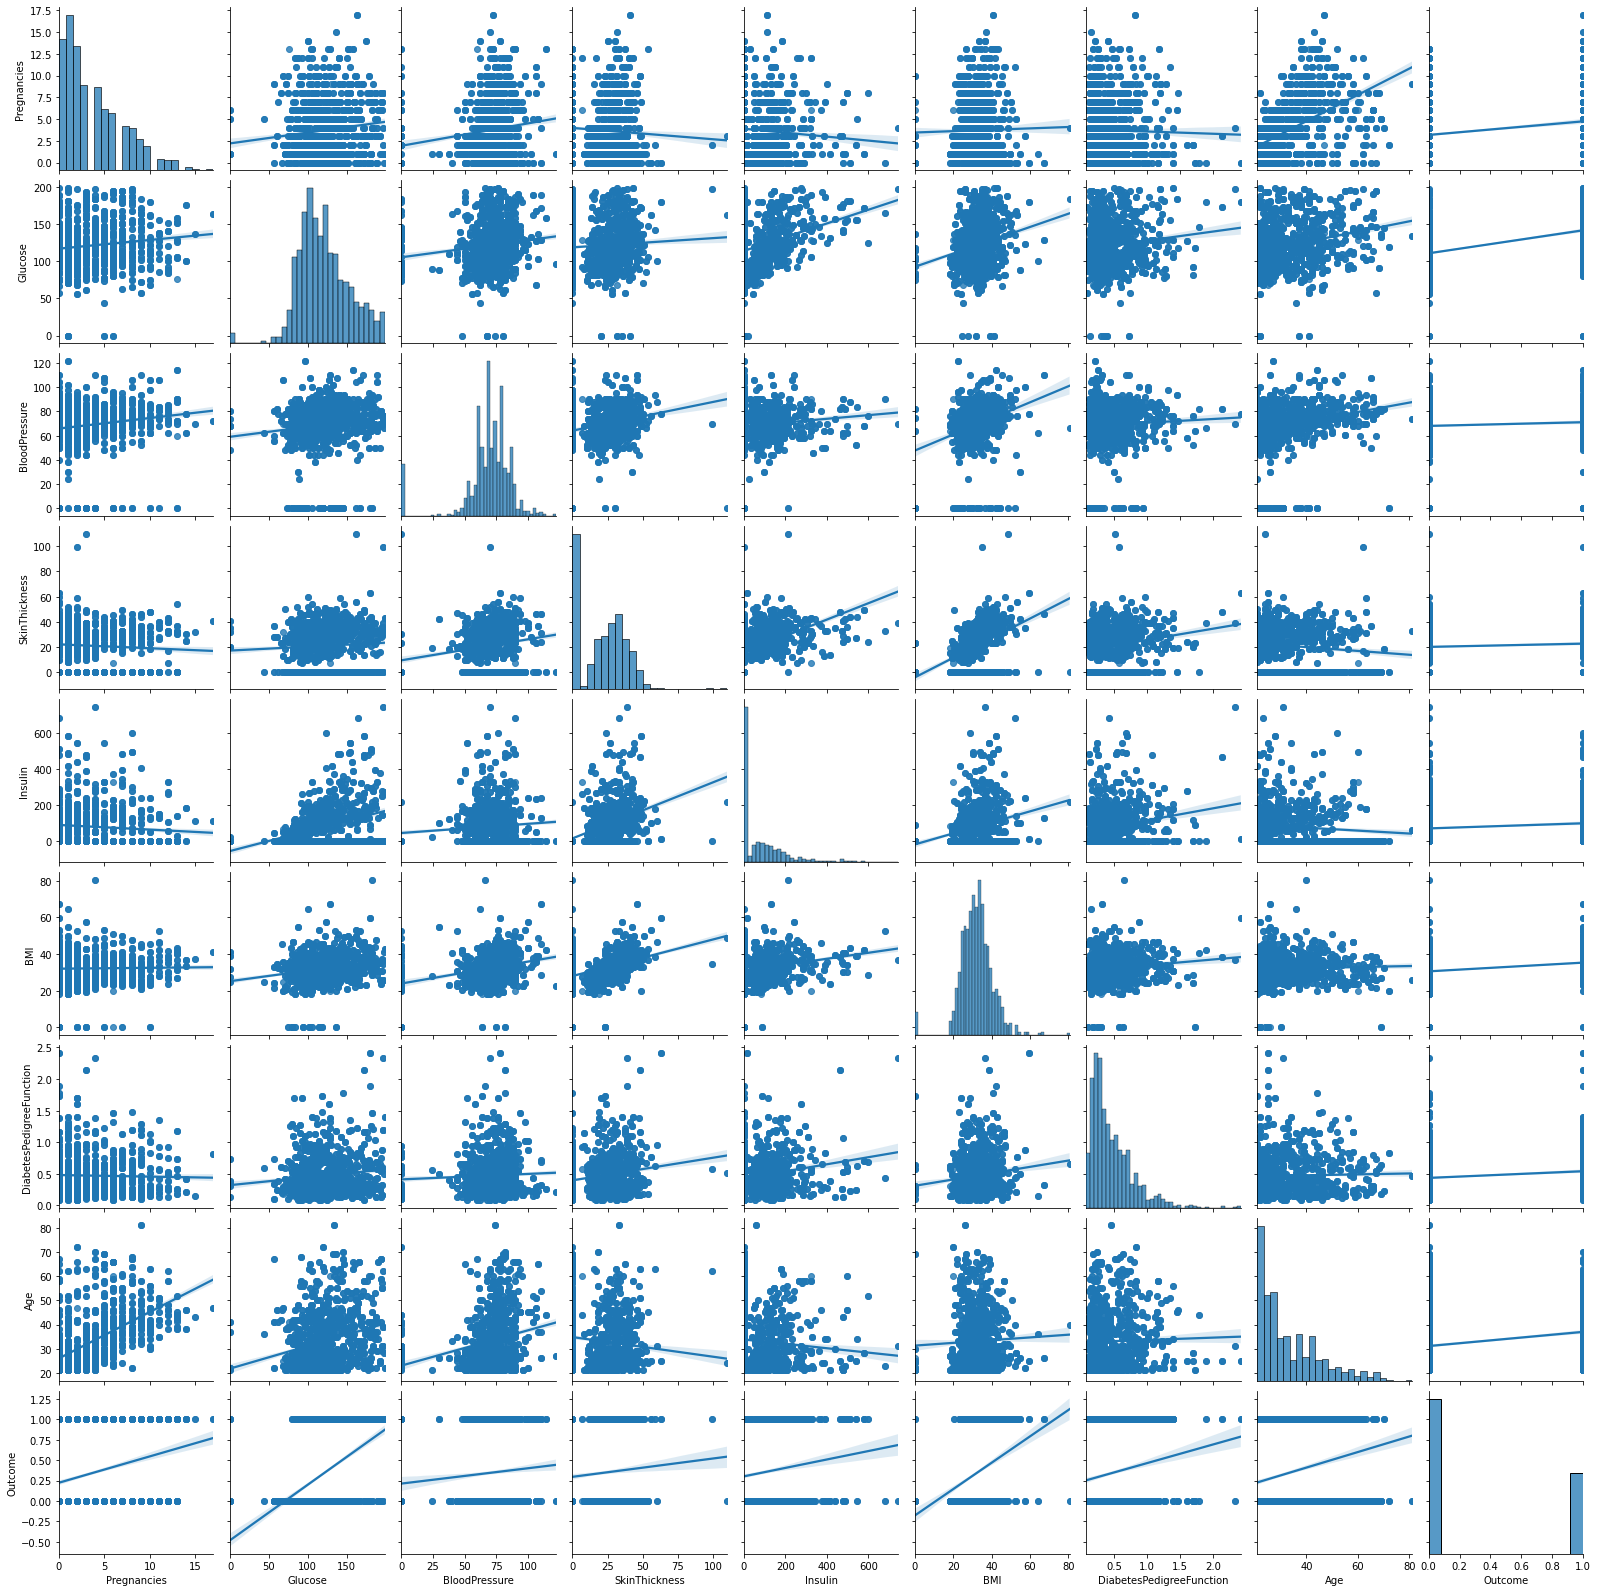

In [ ]:
sns.pairplot(df, kind = "reg")

## Correlation

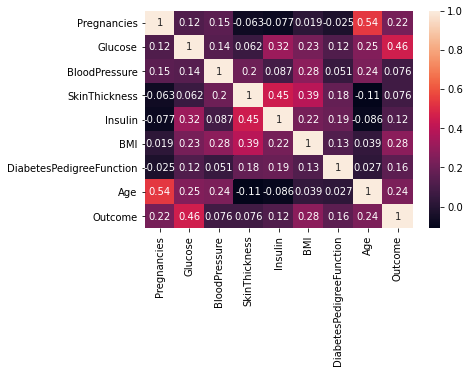

In [ ]:
correlations = df.corr()
plt.Figure(figsize=(20,15))
sns.heatmap(correlations, annot=True);

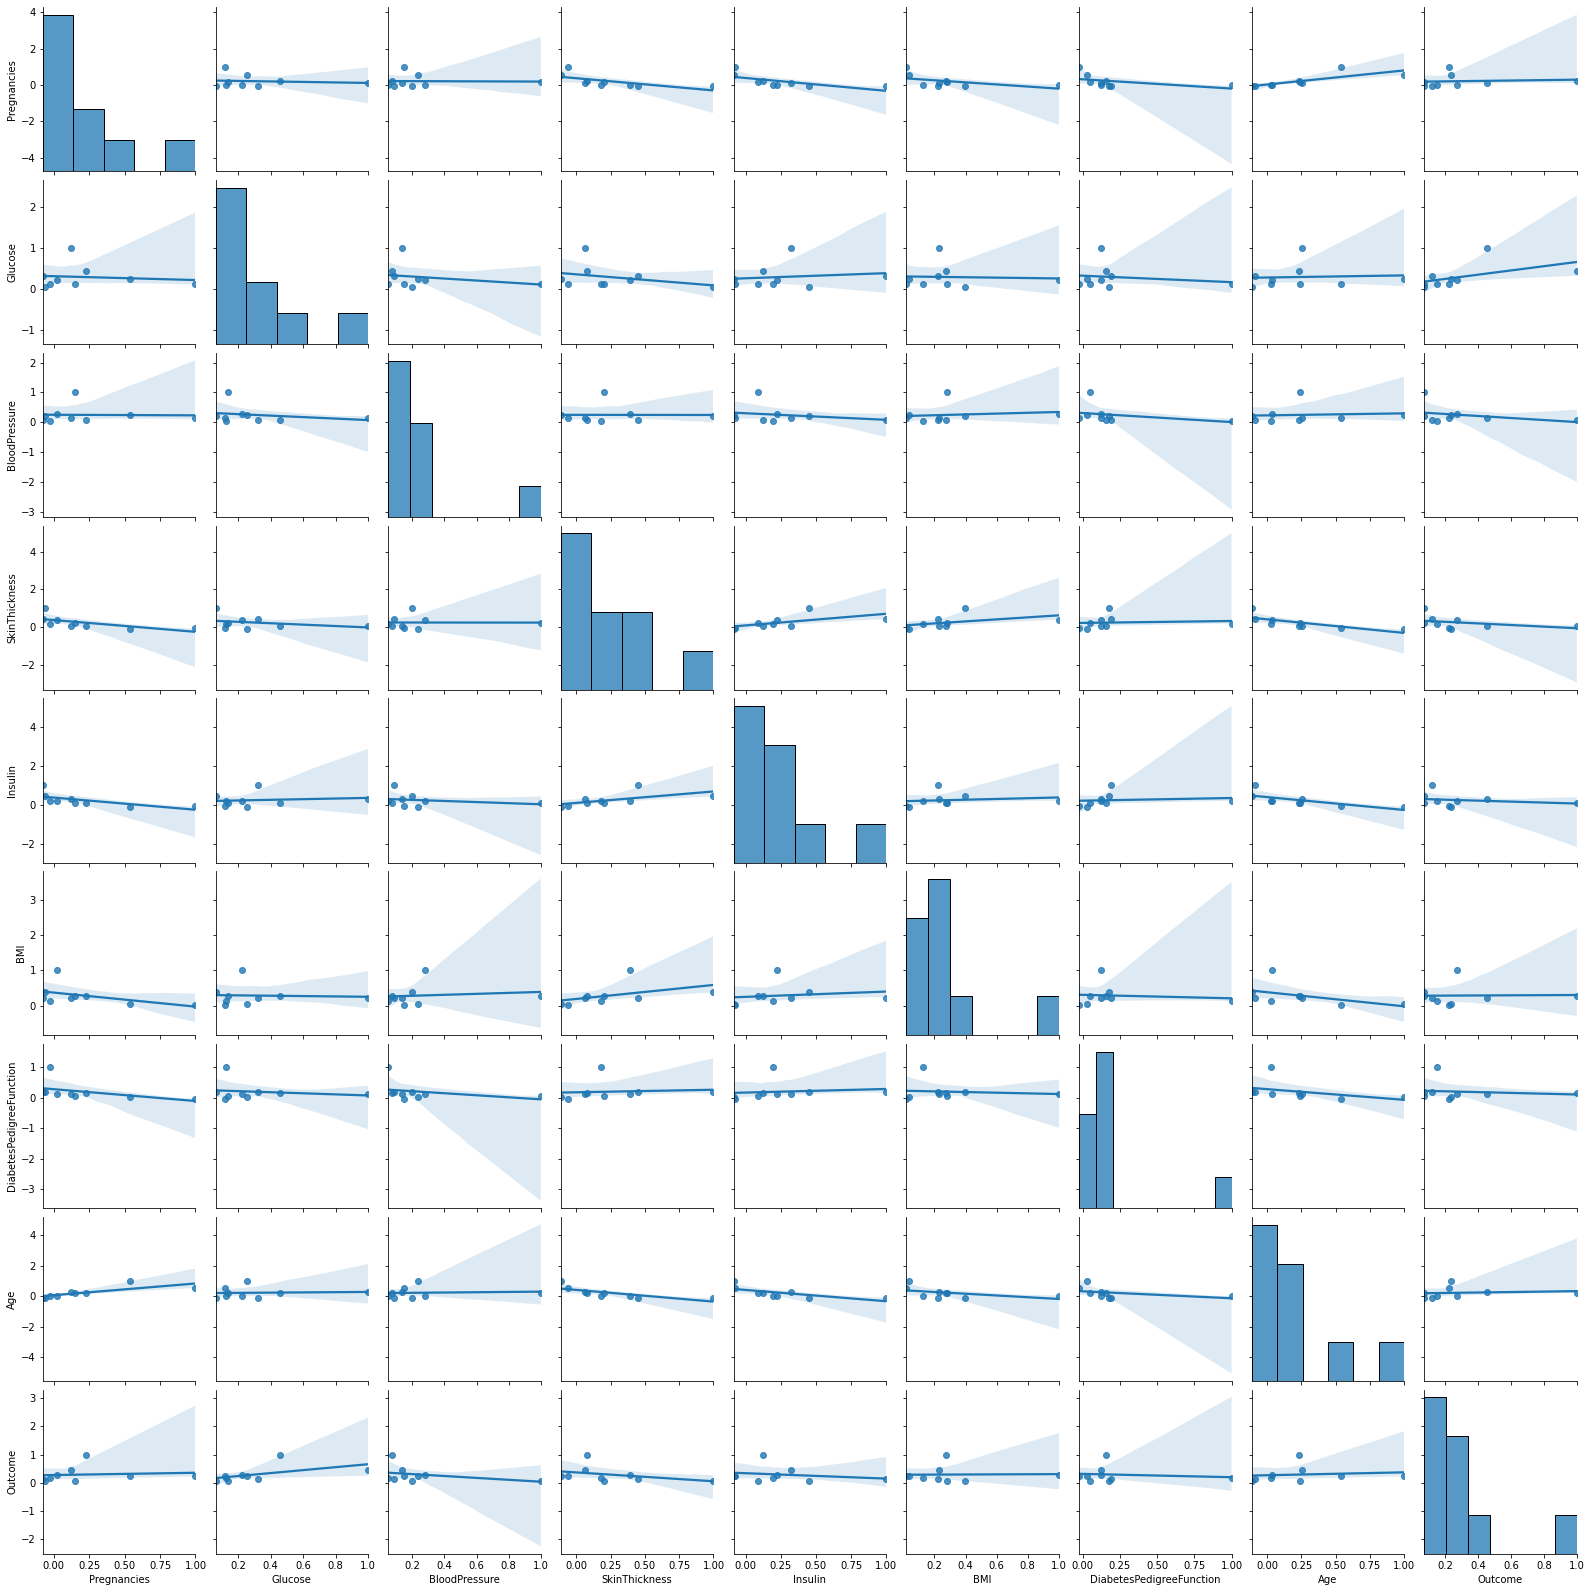

In [ ]:
sns.pairplot(correlations, kind = "reg");

## Feature Selection for Train_Test_Split

In [ ]:
# Before splitting the data, let me copy in new dataset
df1 = df.copy()

In [ ]:
df1.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0


In [ ]:
X = df1.drop(['Outcome'], axis=1)
Y = df1['Outcome']

#or 
#X = df[:,0:8]
#y = df[:, 8]

In [ ]:
# Let]s us split for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
# Let's check the shpae of train and test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1500, 8)
(500, 8)
(1500,)
(500,)


## Model Implementation

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = 'liblinear')
log_model = log.fit(X_train, Y_train)
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Let's predict the model
y_pred = log_model.predict(X_test)

In [ ]:
# Let's check the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[291,  29],
       [ 76, 104]])

In [ ]:
# Let's check the classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       320
           1       0.78      0.58      0.66       180

    accuracy                           0.79       500
   macro avg       0.79      0.74      0.76       500
weighted avg       0.79      0.79      0.78       500



In [ ]:
# Let's check the accuracy report
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.79

In [ ]:
# Let's check the cross-val-score
from sklearn.model_selection import cross_val_score
print(cross_val_score(log_model, X_test, Y_test, cv=10))
print(' After taking the mean of the above result')
print(cross_val_score(log_model, X_test, Y_test, cv=10).mean())

[0.7  0.72 0.86 0.8  0.76 0.8  0.74 0.82 0.86 0.8 ]
 After taking the mean of the above result
0.786


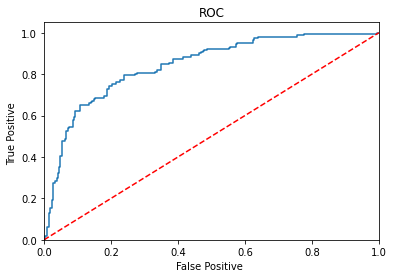

In [ ]:
# Let's check the AUC score
from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc = roc_auc_score(Y_test, log_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, log_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC')
plt.show()

#### Create Hyperparameter Search Space with Logistic Regression

Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV. So we have set these two parameters as a list of values form which GridSearchCV will select the best value of parameter.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 50)

# Now we are creating a dictionary to set all the parameters options for modules.
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
lr_cv = GridSearchCV(log, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = lr_cv.fit(X_train, Y_train)

In [ ]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# Let's check the best SCOre
print("Best LR score:" + str(lr_cv.best_score_))

Best Penalty: l2
Best C: 1.2067926406393286
Best LR score:0.77


### Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train, Y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = nb_model.predict(X_test)
accuracy_score(Y_test, y_pred)

0.788

In [ ]:
# Let's check the cross-val-score
print(cross_val_score(nb_model, X_test, Y_test, cv=10))
print(' After taking the mean of the above result')
print(cross_val_score(nb_model, X_test, Y_test, cv=10).mean())

[0.82 0.72 0.78 0.82 0.82 0.78 0.68 0.78 0.78 0.82]
 After taking the mean of the above result
0.78


#### Create Hyperparameter Search Space with GaussianNB





In [ ]:

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=10,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, Y_train)

gs_NB.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.3s finished


{'var_smoothing': 6.579332246575683e-06}

In [ ]:
print("Best NB score:" + str(gs_NB.best_score_))
print("Best NB parameter: " + str(gs_NB.best_params_))

Best NB score:0.7566666666666667
Best NB parameter: {'var_smoothing': 6.579332246575683e-06}


### KNN(K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier()
Knn_model = Knn.fit(X_train, Y_train)
Knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = Knn_model.predict(X_test)
Acc_Score = accuracy_score(Y_test, y_pred)
Acc_Score

0.782

#### Create Hyperparameter Search Space with K-Nearest Neighbors

In [ ]:
knn_params = {"n_neighbors": np.arange(1,20)}
knn_cv = GridSearchCV(Knn, knn_params, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("Best KNN score:" + str(knn_cv.best_score_))
print("Best KNN parameter: " + str(knn_cv.best_params_))

Best KNN score:0.9506666666666665
Best KNN parameter: {'n_neighbors': 1}


In [ ]:
# Now let's perform the gained perfect params
knn = KNeighborsClassifier(1)
knn_tuned = knn.fit(X_train, Y_train)

In [ ]:
y_pred = knn_tuned.predict(X_test)
Acc_Score2 = accuracy_score(Y_test, y_pred)
Acc_Score2 

0.972

In [ ]:
d = {'Accuracy in KNN before GridSearchCV ': [str(Acc_Score)], 'Accuracy in KNN After GridSearchCV': [str(Acc_Score2)]}
knn_data = pd.DataFrame(data=d)
knn_data

,Accuracy in KNN before GridSearchCV,Accuracy in KNN After GridSearchCV
0,0.782,0.972


### Random Forests


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, Y_train)
y_pred = rf_model.predict(X_test)
acc_score= accuracy_score(Y_test, y_pred)
acc_score

0.978

#### Create Hyperparameter Search Space with Random Forest Classifier

In [ ]:
rf_params = {"max_depth": [2,5,8],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

rf_cv_model.fit(X_train, Y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 14.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
print("Best Params: " + str(rf_cv_model.best_params_))

Best Params: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 1000}


In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 8, 
                                    max_features =  8, 
                                    min_samples_split = 2, 
                                    n_estimators = 1000) 

rf_tuned.fit(X_train, Y_train)
y_pred = rf_tuned.predict(X_test)
acc_score1 = accuracy_score(Y_test, y_pred)
acc_score1

0.936

In [ ]:
confusion_matrix(Y_test, y_pred)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       320
           1       0.93      0.91      0.92       180

    accuracy                           0.94       500
   macro avg       0.94      0.93      0.93       500
weighted avg       0.94      0.94      0.94       500



In [ ]:
d = {'Accuracy in RF before GridSearchCV ': [str(acc_score)], 'Accuracy in RF After GridSearchCV': [str(acc_score1)]}
rf_data = pd.DataFrame(data=d)
rf_data

,Accuracy in RF before GridSearchCV,Accuracy in RF After GridSearchCV
0,0.978,0.936


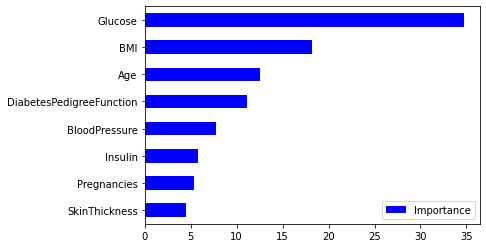

In [ ]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "blue");

### SVM - Support Vector Model

In [ ]:
from sklearn.svm import SVC


svm = SVC(kernel = "linear")
svm_model = svm.fit(X_train, Y_train)

y_pred = svm_model.predict(X_test)
acc_score = accuracy_score(Y_test, y_pred)

0.79

#### Create Hyperparameter Search Space with Support Vector Machine

In [ ]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )
svc_cv_model.fit(X_train, Y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 16.2min


KeyboardInterrupt: ignored

In [ ]:
print("Best Params: " + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned = SVC(kernel = "linear", C = 2).fit(X_train, y_train)

y_pred = svc_tuned.predict(X_test)
acc_score1 = accuracy_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [ ]:
d = {'Accuracy in SVM before GridSearchCV ': [str(acc_score)], 'Accuracy in SVM After GridSearchCV': [str(acc_score1)]}
svm_data = pd.DataFrame(data=d)
svm_data

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm_model = gbm.fit(X_train, Y_train)

y_pred = gbm_model.predict(X_test)
acc_score = accuracy_score(Y_test, y_pred)
acc_score

0.884

#### Create Hyperparameter Search Space with Gradient Boosting Classifier

In [ ]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.3s


KeyboardInterrupt: ignored

In [ ]:
print("Best Params: " + str(gbm_cv.best_params_))

In [ ]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1, 
                                 max_depth = 10,
                                min_samples_split = 2,
                                n_estimators = 100)

gbm_tuned =  gbm.fit(X_train,Y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
acc_score1 = accuracy_score(Y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)
print(classification_report(Y_test, y_pred))

In [ ]:
d = {'Accuracy in GBM before GridSearchCV ': [str(acc_score)], 'Accuracy in GBM After GridSearchCV': [str(acc_score1)]}
gbm_data = pd.DataFrame(data=d)
gbm_data

### All Model Performance

In [ ]:
models = [
    knn_tuned,
    log_model,
    svc_tuned,
    nb_model,
    rf_tuned,
    gbm_tuned,
    
]


for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print("-"*28)
    print(name + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

In [ ]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)    
    result = pd.DataFrame([[name, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('accuracy rate of models'); 